# Python proyect

In [61]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [62]:
#Read datasets and view them
venta = pd.read_csv('datasets\Ventas.csv')
articulo = pd.read_csv('datasets\Articulos.csv')
cliente = pd.read_csv('datasets\Clientes.csv')

In [63]:
venta.head()

,Numero_Cliente,Familia_Comercial,Cadena_Comercial,Rama,Tipo,Mov,MovId,SKU,Articulo,lll,...,IEPS_Cuota,ImporteTotal,Costo_Unitario,Costo_Total,CostoProduccionUnitario,CostoProduccion,Sucursal,FechaEmision,FechaRequerida,Almacen
0,777,MAYORISTAS,MAYORISTAS,CLME,Exportacion,Factura Com.Ext33,FCREM6,10822,RM00010822,---,...,0,9767.7408,0.4045,6796.3762,0.3491,5864.88,60,44235,44235,REM12
1,581,OTROS,OTROS,INTERCOMPA,Intercompañia,Factura,FREM1,574,RM00000574,---,...,0,1276.0000,0.0000,0.0000,0.0000,0.00,60,44236,44236,REM04
2,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM9,10473,RM00010473,---,...,0,17821.4400,0.3963,10386.2304,0.0000,0.00,60,44237,44237,REM12
3,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10176,RM00010176,---,...,0,2950.6000,0.0840,1679.8120,0.0548,1096.00,60,44237,44236,REM12
4,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10650,RM00010650,---,...,0,3520.0000,0.0950,3040.0000,0.1100,3520.00,60,44237,44236,REM12


In [64]:
articulo.head()

,Articulo,Desc_Articulo,Familia
0,RM00010822,TAPA ROSCA PEAD 56 BC BLANCA CAJA 7.5 GR,TAPAS Y ASAS
1,RM00000574,SERVICIO DE ENTREGA,SERVICIOS
2,RM00010473,BOTELLA PET 500 ML 26 BC MOD 500-26 TRANSPAREN...,BOTELLAS SOPLADAS
3,RM00010176,TAPA ROSCA PEAD 28 BC BLANCA BOLSA 1.8 GR,TAPAS Y ASAS
4,RM00010650,TAPA ROSCA #26 SC CNS BLANCA,REVENTA


In [65]:
cliente.head()

,Numero_Cliente,Nombre_Cliente
0,777,RECURSOS NATURALES PARA LA VIDA SA
1,581,PLANTA HBS-DELLI
2,915,FABIAN FRANCISCO CHI TIN66193
3,851,HIELOS DE PALENQUE
4,888,PRODUCTOS QUIMICOS LA ANITA


In [66]:
#Making column names 'Python friendly'
venta.columns = venta.columns.str.lower().str.replace(' ', '_')
articulo.columns = articulo.columns.str.lower().str.replace(' ', '_')
cliente.columns = cliente.columns.str.lower().str.replace(' ', '_')

#Making a new Df with Df names and column names to check
venta_colnames = pd.DataFrame({'Df_name': 'venta', 'Column_name': venta.columns})
articulo_colnames= pd.DataFrame({'Df_name': 'articulo', 'Column_name': articulo.columns})
cliente_colnames = pd.DataFrame({'Df_name': 'cliente', 'Column_name': cliente.columns})

df_col_names = pd.concat([venta_colnames, articulo_colnames, cliente_colnames], ignore_index = True)
#df_col_names = df_col_names.groupby('Df_name')['Column_name'].apply(list).reset_index()
#ls_col_names = df_col_names.groupby('Df_name')['Column_name'].apply(list).reset_index().values.tolist()
#ls_col_names
df_col_names

,Df_name,Column_name
0,venta,numero_cliente
1,venta,familia_comercial
2,venta,cadena_comercial
3,venta,rama
4,venta,tipo
5,venta,mov
6,venta,movid
7,venta,sku
8,venta,articulo
9,venta,lll


In [67]:
#Making a join Df to merge all data frames in a sigle one

#To do it, first check if there are na values in key columns
key_values = pd.concat([venta['articulo'], venta['numero_cliente'], articulo['articulo'], cliente['numero_cliente']])
key_values_count = key_values.isna().sum()

if key_values_count > 0:
    print(f'\033[96m\nThere are {key_values_count} na values in key columns, be carefull when you join it\n')
else:
    print(f'\033[96m\nThere are no na values in key columns, make your join c:\n')


There are no na values in key columns, make your join c:



In [68]:
#Join all data frames
full0 = pd.merge(venta, articulo, on ='articulo')
full = pd.merge(full0, cliente, on = 'numero_cliente')
full.head()

,numero_cliente,familia_comercial,cadena_comercial,rama,tipo,mov,movid,sku,articulo,lll,...,costo_total,costoproduccionunitario,costoproduccion,sucursal,fechaemision,fecharequerida,almacen,desc_articulo,familia,nombre_cliente
0,777,MAYORISTAS,MAYORISTAS,CLME,Exportacion,Factura Com.Ext33,FCREM6,10822,RM00010822,---,...,6796.3762,0.3491,5864.88,60,44235,44235,REM12,TAPA ROSCA PEAD 56 BC BLANCA CAJA 7.5 GR,TAPAS Y ASAS,RECURSOS NATURALES PARA LA VIDA SA
1,581,OTROS,OTROS,INTERCOMPA,Intercompañia,Factura,FREM1,574,RM00000574,---,...,0.0000,0.0000,0.00,60,44236,44236,REM04,SERVICIO DE ENTREGA,SERVICIOS,PLANTA HBS-DELLI
2,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM9,10473,RM00010473,---,...,10386.2304,0.0000,0.00,60,44237,44237,REM12,BOTELLA PET 500 ML 26 BC MOD 500-26 TRANSPAREN...,BOTELLAS SOPLADAS,FABIAN FRANCISCO CHI TIN66193
3,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10176,RM00010176,---,...,1679.8120,0.0548,1096.00,60,44237,44236,REM12,TAPA ROSCA PEAD 28 BC BLANCA BOLSA 1.8 GR,TAPAS Y ASAS,FABIAN FRANCISCO CHI TIN66193
4,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10650,RM00010650,---,...,3040.0000,0.1100,3520.00,60,44237,44236,REM12,TAPA ROSCA #26 SC CNS BLANCA,REVENTA,FABIAN FRANCISCO CHI TIN66193


## Dataset cleaning

* ### Validating data type

In [69]:
#Summary of columns and data types
full.dtypes

numero_cliente              object
familia_comercial           object
cadena_comercial            object
rama                        object
tipo                        object
mov                         object
movid                       object
sku                         object
articulo                    object
lll                         object
propiedades                 object
cantidad                   float64
um                          object
cantidadsecundaria         float64
umsecundaria                object
factorlitros                 int64
precio                     float64
subtotal                   float64
descuentolineal            float64
iva                        float64
ieps                         int64
ieps_cuota                   int64
importetotal               float64
costo_unitario             float64
costo_total                float64
costoproduccionunitario    float64
costoproduccion            float64
sucursal                     int64
fechaemision        

In [70]:
#numero_cliente should be numeric type
#function that return a subset data frame(df) with non-numeric values in a column(col)
def filter_non_numeric(df, col):
    non_numeric_mask = df[col].apply(lambda x: not str(x).isnumeric())
    filtered_df = df[non_numeric_mask]
    return filtered_df

In [71]:
#With filter_non_numeric function find all rows that 'numero_cliente' are not numeric, and articles in this query are not sellables. It will remove
non_num_df = filter_non_numeric(full, 'numero_cliente')
print(non_num_df['numero_cliente'].unique())
non_num_df
#All articles are not sellable, so it will removed and change 'numero_cliente' data type
full = full[full['numero_cliente'] != 'REMSA']
full['numero_cliente'] = full['numero_cliente'].astype(int)

['REMSA']


In [72]:
#'fechaemision' and 'fecharequerida' should be datetime
full['fechaemision'] = pd.to_datetime(full['fechaemision'], unit='D', origin='1899-12-30')
full['fecharequerida'] = pd.to_datetime(full['fecharequerida'], unit='D', origin='1899-12-30')

* ### Cleaning na values

In [73]:
#Summary of columns with na values
na_columns = full.isnull().sum()
na_columns[na_columns > 0]

propiedades       38
um                38
umsecundaria    6066
almacen           38
familia            3
dtype: int64

In [74]:
#Checking 'propiedades' na values
p_na = full[full['propiedades'].isna()]
p_na['desc_articulo'].unique()

array(['BONIFICACION POR NOTA DE CREDITO'], dtype=object)

In [75]:
#'propiedades' na values are not real articles, don't need it. It will remove
full = full.dropna(subset = ['propiedades'])

In [76]:
#um and almacen na were gone when remove propieades's na. Great
na_columns = full.isnull().sum()
na_columns[na_columns > 0]

umsecundaria    6028
familia            3
dtype: int64

In [77]:
#Checking 'umsecundaria' na values
umsec_na = full[full['umsecundaria'].isna()]
print(umsec_na['um'].unique())

#Checking 'umsecundaria' na values where 'um' = 'SR'
umsec_na = umsec_na[umsec_na['um'] == 'SR']
print(umsec_na['desc_articulo'].unique())

['SR' 'PZA']
['SERVICIO DE ENTREGA']


In [78]:
#Articles where umsecundaria is na and um is 'SR' are services. Don't need it. It will remove
full = full[~(full['umsecundaria'].isna() & (full['um'] == 'SR'))]

In [79]:
#Checking 'umsecundaria' na values where 'um' = 'PZA'
umsec_na = full[full['umsecundaria'].isna()]
print(umsec_na['desc_articulo'].unique())

['BOTELLA PET 500 ML 26 BC MOD 500-26 TRANSPARENTE 11.5 GR'
 'GARRAFON PET 20 L 56 MM ROSA CON ASA ROSA PASTEL 740 GR'
 'GARRAFA PEAD DE 3.785 L 38 MM VERDE AGUAMARINA 130 GR'
 'GARRAFA PEAD 3.785 L 38 MM NATURAL 130 GR'
 'GARRAFON PET 20 L 56 MM AZUL CON ASA AZUL 740 GR'
 'BOTELLA PET 500 ML 28 BC MOD 500-45 AZUL COBALTO 15.5 GR'
 'GARRAFA PET 3.785 L 48 MM MOD CUADRADA CON ASA BLANCA TRANSPARENTE 80 GR'
 'BOTELLA PET 1000 ML 28 BC MOD 1000-80 TRANSPARENTE 24.5 GR S'
 'GARRAFA PET 5LT 80GR TRANSPARENTE SIN ASA REMSA'
 'GARRAFA PET 5 L 48 MM MOD CUADRADA CON ASA BLANCA TRANSPARENTE 80 GR'
 'BOTELLA PET 1000 ML 28 BC MOD 1000-43 TRANSPARENTE 32 GR'
 'GARRAFON PET 20 L 56 MM MOD. ELECTRON AZUL CON ASA BLANCA 740 GR'
 'BOTELLA PET 1000 ML 26 BC MOD 1000-26 TRANSPARENTE 18.5 G'
 'BOTELLA PET 148 ML 28 BL MOD. 148-24 TRANSPARENTE 19 GR'
 'BOTELLA PET 250 ML 28 BC MOD. JUGOS TRANSPARENTE 15 GR I'
 'BOTELLA PET 500 ML 28 BL MOD 500-BOSTON LISA TRANSPARENTE 24 GR'
 'GARRAFA PET 6 L 48 MM MOD C

In [80]:
#Articles where 'umsecundaria' is na and 'um' is 'PZA' are sellable, so replace na values with 'PZA'
full['umsecundaria'] = full['umsecundaria'].fillna('PZA')
na_columns = full.isnull().sum()
na_columns[na_columns > 0]

familia    3
dtype: int64

In [81]:
#Finally onlu there are na values in 'familia column'
#checking 'familia' na values
fam_na = full[full['familia'].isna()]
fam_na['desc_articulo'].unique()

array(['ARTICULO DE PRODUCCION GENERICO REMSA'], dtype=object)

In [82]:
#Articles where 'familia' is na and. are not seallable. It will remove
full = full.dropna(subset = ['familia'])
na_columns = full.isnull().sum()
na_columns[na_columns > 0]

Series([], dtype: int64)

In [83]:
full.head()
#full.to_csv('full.csv', index=False)

,numero_cliente,familia_comercial,cadena_comercial,rama,tipo,mov,movid,sku,articulo,lll,...,costo_total,costoproduccionunitario,costoproduccion,sucursal,fechaemision,fecharequerida,almacen,desc_articulo,familia,nombre_cliente
0,777,MAYORISTAS,MAYORISTAS,CLME,Exportacion,Factura Com.Ext33,FCREM6,10822,RM00010822,---,...,6796.3762,0.3491,5864.88,60,2021-02-08,2021-02-08,REM12,TAPA ROSCA PEAD 56 BC BLANCA CAJA 7.5 GR,TAPAS Y ASAS,RECURSOS NATURALES PARA LA VIDA SA
2,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM9,10473,RM00010473,---,...,10386.2304,0.0000,0.00,60,2021-02-10,2021-02-10,REM12,BOTELLA PET 500 ML 26 BC MOD 500-26 TRANSPAREN...,BOTELLAS SOPLADAS,FABIAN FRANCISCO CHI TIN66193
3,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10176,RM00010176,---,...,1679.8120,0.0548,1096.00,60,2021-02-10,2021-02-09,REM12,TAPA ROSCA PEAD 28 BC BLANCA BOLSA 1.8 GR,TAPAS Y ASAS,FABIAN FRANCISCO CHI TIN66193
4,915,OTROS,EXPORTACION,CLME,Cliente,Factura Com.Ext33,FCREM10,10650,RM00010650,---,...,3040.0000,0.1100,3520.00,60,2021-02-10,2021-02-09,REM12,TAPA ROSCA #26 SC CNS BLANCA,REVENTA,FABIAN FRANCISCO CHI TIN66193
6,851,OTROS,OTROS,CLNA,Cliente,Factura,FREM5,10495,RM00010495,---,...,17475.8364,0.0000,0.00,60,2021-02-11,2021-02-09,REM12,GARRAFON PET 20 L 56 MM ROSA CON ASA ROSA PAST...,GARRAFON PET,HIELOS DE PALENQUE


# Consultas 

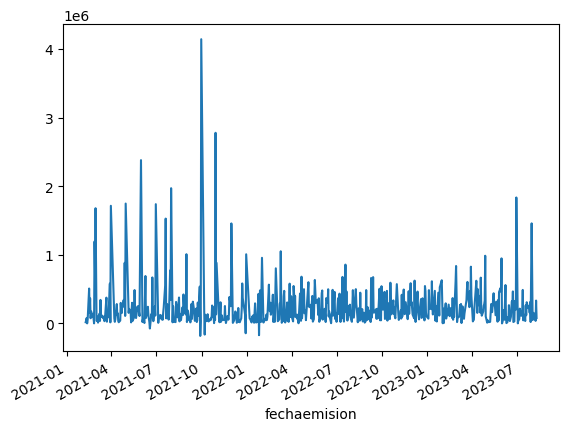

In [84]:
# ventas a lo largo del tiempo 

full['fechaemision'] = pd.to_datetime(full['fechaemision'])
full.groupby('fechaemision')['cantidad'].sum().plot(kind='line')
plt.show()

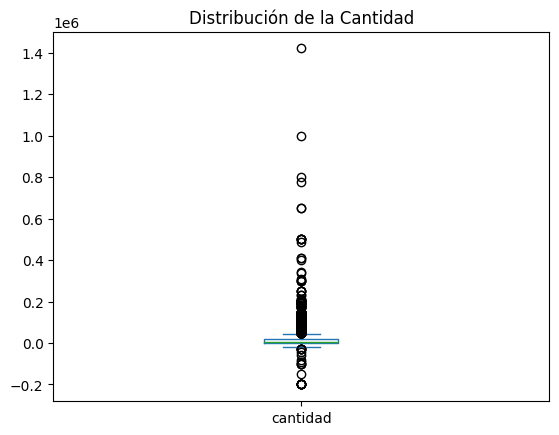

In [85]:
#visualización de cómo se distribuyen los valores de las cantidades
full['cantidad'].plot(kind='box')
plt.title('Distribución de la Cantidad')
plt.show()

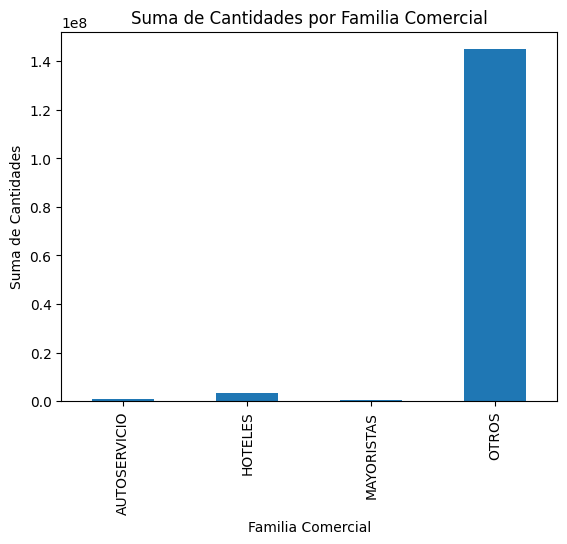

In [86]:
# Mostrar la suma de cantidades vendidas por cada familia comercial
agrupado_familia = full.groupby('familia_comercial')['cantidad'].sum()
agrupado_familia.plot(kind='bar')
plt.title('Suma de Cantidades por Familia Comercial')
plt.xlabel('Familia Comercial')
plt.ylabel('Suma de Cantidades')
plt.show()

In [87]:
# Visualizar la proporción de costos totales por artículo

full['costo_total'] = full['costo_unitario'] * full['cantidad']
full.groupby('articulo')['costo_total'].sum().apply(lambda x: f'{x:,.2f}')

articulo
RM00000040       309,146.35
RM00000043        14,679.26
RM00000078       137,125.44
RM00000086       201,647.74
RM00000089        46,752.29
                  ...      
RM00010846        26,085.36
RM00010848    15,323,060.89
RM00010855       179,868.95
RM00010860       211,604.26
RM00010861       698,324.00
Name: costo_total, Length: 195, dtype: object

In [88]:
#Identificar los clientes que generaron los mayores importes totales
def top_clients(n):
    return full.groupby('nombre_cliente')['importetotal'].sum().nlargest(n).apply(lambda x: f'{x:,.2f}')

top_clients(10)

nombre_cliente
PLANTA HBS-DELLI                              149,508,746.62
ENVASUR                                        27,767,850.41
EMBOTELLADOS Y DISTRIBUCIONES BORSA            16,859,101.74
CUELLOS DISTILLERY LTD                         16,651,719.71
L & R LIQUORS LIMITED TIN 16682                12,047,800.18
ALIMENTOS Y BEBIDAS LA MEZTIZA DEL CHONTAL     10,725,789.62
FABIAN FRANCISCO CHI TIN66193                   9,564,814.11
DISTRIBUCIONES DEL SURESTE PRECA                8,085,757.85
CITRUS COMPANY OF BELIZE LTD                    7,072,781.13
HBS-DELLI RETAIL                                5,755,577.46
Name: importetotal, dtype: object

In [89]:
#Calcular el costo total y el costo unitario promedio por artículo.
full['costo_total'] = full['costo_unitario'] * full['cantidad']
costo_promedio_por_articulo = full.groupby('articulo')['costo_total'].mean()
costo_promedio_por_articulo

articulo
RM00000040    15457.317480
RM00000043    14679.264600
RM00000078     7618.080167
RM00000086    20164.774440
RM00000089    46752.288000
                  ...     
RM00010846     8695.119767
RM00010848    34746.169814
RM00010855    14989.079292
RM00010860    13225.265988
RM00010861    14548.416750
Name: costo_total, Length: 195, dtype: float64

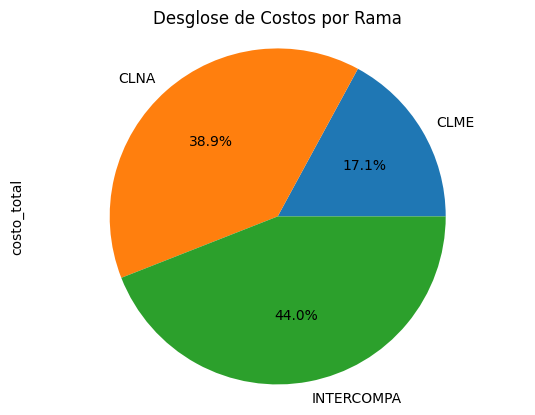

In [90]:
# Analiza cómo se distribuyen los costos totales por cada rama.
costos_por_rama = full.groupby('rama')['costo_total'].sum()
costos_por_rama.plot(kind='pie', autopct='%1.1f%%')
plt.title('Desglose de Costos por Rama')
plt.axis('equal')
plt.show()

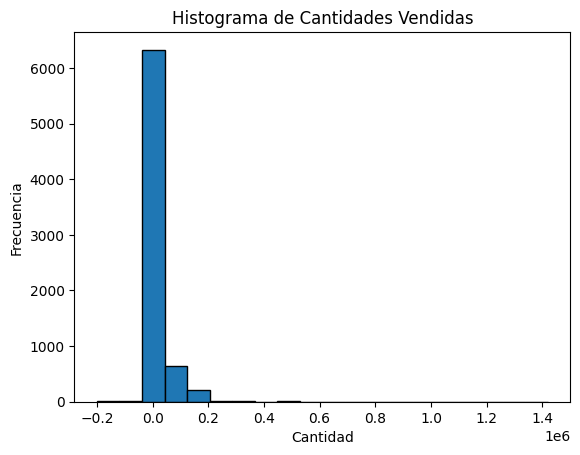

In [91]:
# Visualiza la distribución de cantidades vendidas para cada rama
plt.hist(full['cantidad'], bins=20, edgecolor='black')
plt.title('Histograma de Cantidades Vendidas')
plt.xlabel('Cantidad')
plt.ylabel('Frecuencia')
plt.show()

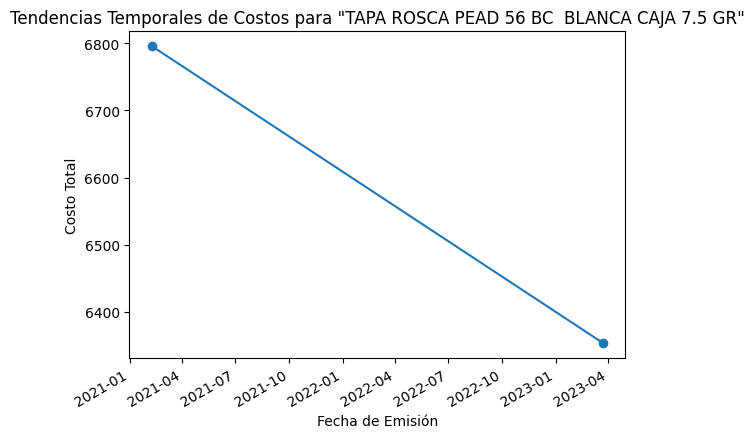

In [92]:
#Analiza cómo varían los costos totales de producción para un producto específico a lo largo del tiempo 

producto_seleccionado = 'TAPA ROSCA PEAD 56 BC  BLANCA CAJA 7.5 GR' 
costos_por_producto = full[full['desc_articulo'] == producto_seleccionado].groupby('fechaemision')['costo_total'].sum()
costos_por_producto.plot(kind='line', marker='o')
plt.title(f'Tendencias Temporales de Costos para "{producto_seleccionado}"')
plt.xlabel('Fecha de Emisión')
plt.ylabel('Costo Total')
plt.show()

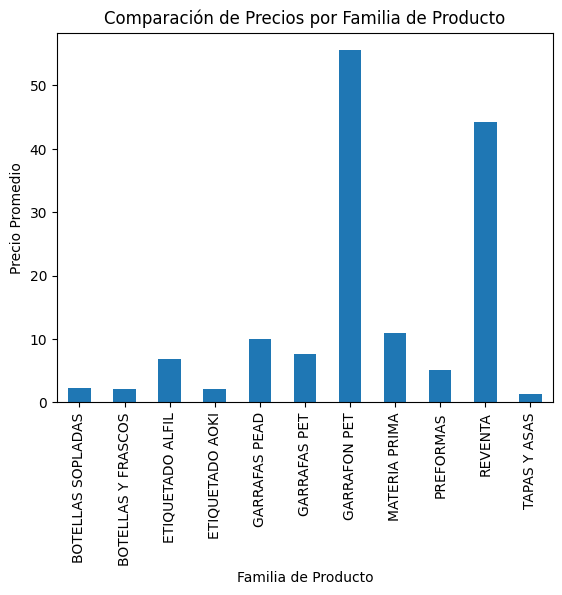

In [93]:
#Compara los precios promedio de productos en cada familia
precios_promedio_por_familia = full.groupby('familia')['precio'].mean()
precios_promedio_por_familia.plot(kind='bar')
plt.title('Comparación de Precios por Familia de Producto')
plt.xlabel('Familia de Producto')
plt.ylabel('Precio Promedio')
plt.show()

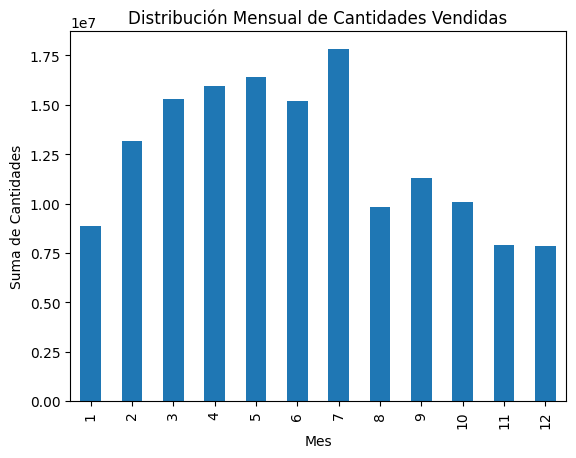

In [94]:
#Piezas vendidas
full['mes'] = full['fechaemision'].dt.month
cantidades_mensuales = full.groupby('mes')['cantidad'].sum()
cantidades_mensuales.plot(kind='bar')
plt.title('Distribución Mensual de Cantidades Vendidas')
plt.xlabel('Mes')
plt.ylabel('Suma de Cantidades')
plt.show()

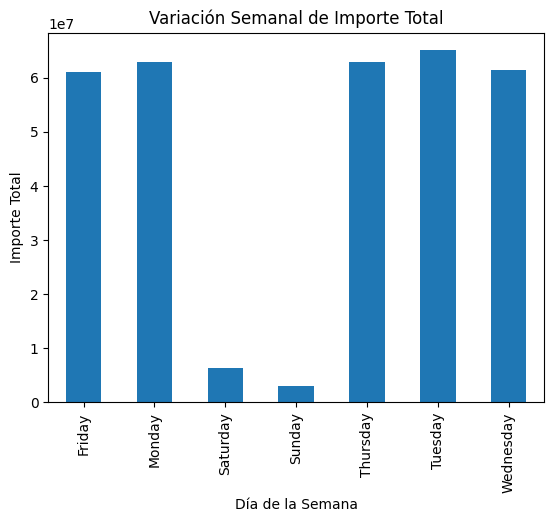

In [95]:
#Comportamiento diario
full['dia_semana'] = full['fechaemision'].dt.day_name()
importe_semanal = full.groupby('dia_semana')['importetotal'].sum()
importe_semanal.plot(kind='bar')
plt.title('Variación Semanal de Importe Total')
plt.xlabel('Día de la Semana')
plt.ylabel('Importe Total')
plt.show()
